In [1]:
import pandas as pd
import numpy as np

from importlib import reload

# import plotly
# import plotly.graph_objs as go
%matplotlib inline

In [2]:
import gameplan as gp
from gameplan.portfolio import Portfolio

In [3]:
misc = gp.expenses.Expense(
        expense_type='misc_spending',
        freq='M',
        amount=5000, 
        recurring=True,
        start_dt='2019-09-10', 
        growth_series=gp.growth_series.StochasticGrowth,
        growth_per_period_fn=lambda x: .02/12,
        growth_start_dt='2019-09-10', 
        growth_freq=pd.DateOffset(months=1),
        local_vol=0.10
    )

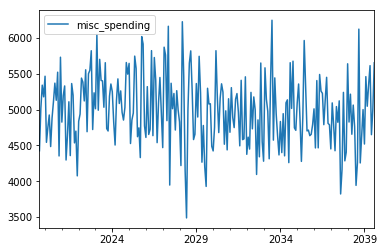

In [4]:
misc.cash_flows_df.plot()

In [5]:
r=gp.expenses.Rent(
    amount=2200, 
    start_dt='2019-09-01', 
    growth_start_dt='2020-01-01', 
    growth_freq=pd.DateOffset(years=1),
#     incorporate_discounting=False
)

/Users/davidbrodsky/.pyenv/versions/3.7.3/envs/db_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:799: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


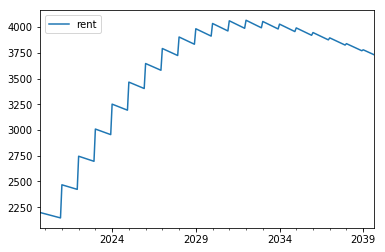

In [6]:
r.cash_flows_df.plot()

In [7]:
port = Portfolio(initial_cash_savings=200000, interest_rate=0.015)

In [8]:
s = gp.income_streams.Salary(
    paycheck_amt=180000/26, 
    payday_freq='2W-Fri', 
    tax_rate=0.375, 
    growth_start_dt='2019-10-22',
    incorporate_growth=True, 
    incorporate_discounting=True
)

existing_401k = gp.assets.Equity(init_value=45000)

/Users/davidbrodsky/repos/gameplan/gameplan/collections.py:114: UserWarning: This Collection is empty.
  if warn: warnings.warn('This Collection is empty.')


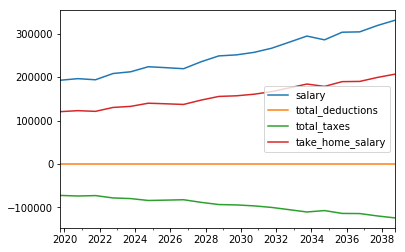

In [9]:
s.paycheck_df.resample('365d').sum().plot()

In [10]:
s.cash_flows_df.head()

,salary
2019-10-04,6923.076923
2019-10-18,6917.823966
2019-11-01,7219.770707
2019-11-15,7214.292630
2019-11-29,7208.818709


In [11]:
existing_401k.credits_and_debits.as_df

,initial_balance,total_net_cash_flow
2019-09-29,45000,45000


In [12]:
port.add_income_stream(s, label='salary', if_exists='overwrite')
port.add_asset(existing_401k, label='401k', if_exists='overwrite')

In [13]:
port.add_401k_contribution(
    income_stream_label='salary', 
    contrib_pct=0.06, 
    employer_match=dict(upto=0.04, pct_match=0.5),
    label='401k'
)

/Users/davidbrodsky/repos/gameplan/gameplan/collections.py:114: UserWarning: This Collection is empty.
  if warn: warnings.warn('This Collection is empty.')


In [14]:
# need to incorporate growth here
port.add_pretax_expense(
    from_income_stream_label='salary',
    amt=180/2, 
    label='health_insurance',
    if_exists='overwrite'
)
port.add_pretax_expense('salary', label='HSA', amt=291.66/2, if_exists='overwrite')
port.add_pretax_expense('salary', label='travel', amt=127/2, if_exists='overwrite')

/Users/davidbrodsky/repos/gameplan/gameplan/collections.py:43: UserWarning: Label 'cash_inflows' already exists. Will overwrite.
  warnings.warn(warning_message)


In [15]:
port.add_expense(
    expense=gp.expenses.Rent(
        amount=2200, 
        start_dt='2019-09-01', 
        min_growth=0.025, 
        max_growth=0.15, 
        growth_start_dt='2020-01-01', 
        growth_freq=pd.DateOffset(years=1)
    ),
    if_exists='overwrite'
)

#the path dependence here feels wrong; think about how to handle fluctuations that are random but mean(?) reverting
port.add_expense(
    expense=gp.expenses.Utilities(
        amount=130, 
        start_dt='2019-09-05', 
        min_growth= -0.05, 
        max_growth=0.052, 
        growth_start_dt='2019-09-05', 
        growth_freq=pd.DateOffset(months=1)
    ),
    if_exists='overwrite'
)

# Again, feels like this is stochastic growth w/ a trend 
port.add_expense(
    expense=gp.expenses.Expense(
        expense_type='misc_spending',
        freq='M',
        amount=5000, 
        recurring=True,
        start_dt='2019-09-10', 
        min_growth=-0.07, 
        max_growth=0.075, 
        growth_start_dt='2019-09-10', 
        growth_freq=pd.DateOffset(months=1)
    ),
    if_exists='overwrite'
)

/Users/davidbrodsky/.pyenv/versions/3.7.3/envs/db_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:799: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/davidbrodsky/repos/gameplan/gameplan/collections.py:43: UserWarning: Label 'cash_outflows' already exists. Will overwrite.
  warnings.warn(warning_message)


In [16]:
port.income_streams.contents['salary'].paycheck_df.tail()

,salary,total_deductions,total_taxes,take_home_salary
2039-07-29,12665.132668,-714.714615,-4481.406770,7469.011283
2039-08-12,12655.522865,-714.714615,-4477.803094,7463.005156
2039-08-26,12645.920354,-714.714615,-4474.202152,7457.003587
2039-09-09,12636.325129,-714.714615,-4470.603943,7451.006571
2039-09-23,12626.737184,-714.714615,-4467.008463,7445.014106


In [17]:
port.income_streams.contents['salary'].take_home_salary.resample('365D').sum().divide(12).multiply(0.33)

2019-10-04    2980.380754
2020-10-03    3055.592104
2021-10-03    3011.050598
2022-10-03    3258.559204
2023-10-03    3327.011673
2024-10-02    3526.721784
2025-10-02    3489.894618
2026-10-02    3448.385604
2027-10-02    3724.505318
2028-10-01    3954.664251
2029-10-01    3995.611128
2030-10-01    4094.908377
2031-10-01    4259.005216
2032-09-30    4497.491027
2033-09-30    4726.860133
2034-09-30    4590.116515
2035-09-30    4891.412123
2036-09-29    4905.683877
2037-09-29    5156.695699
2038-09-29    5364.894812
Freq: 365D, Name: take_home_salary, dtype: float64

# DB YOU ARE HERE

In [32]:
misc = gp.expenses.Expense(
        expense_type='misc_spending',
        freq='M',
        amount=5000, 
        recurring=True,
        start_dt='2019-09-10',
        growth_series=gp.growth_series.ExponentialGrowth,
        growth_per_period_fn=None,
        addtl_growth_params=dict(
            points_to_fit=[
                (0,1), 
                (365, 1.03), 
                (2*365, 1.03**2), 
                (10*365, 1.03**10), 
                (20*365, 1.03**20)
            ],
        ),
        growth_freq=pd.DateOffset(months=1),
        incorporate_discounting=True,
        local_vol=0.1,
        
    )

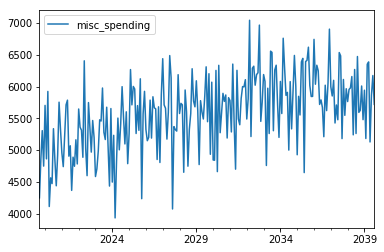

In [33]:
misc.cash_flows_df.plot()

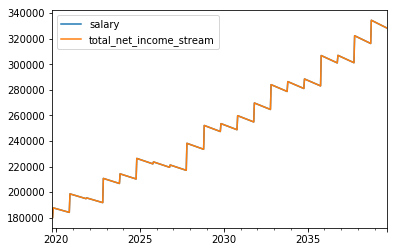

In [34]:
port.income_streams.as_df.multiply(26).plot()

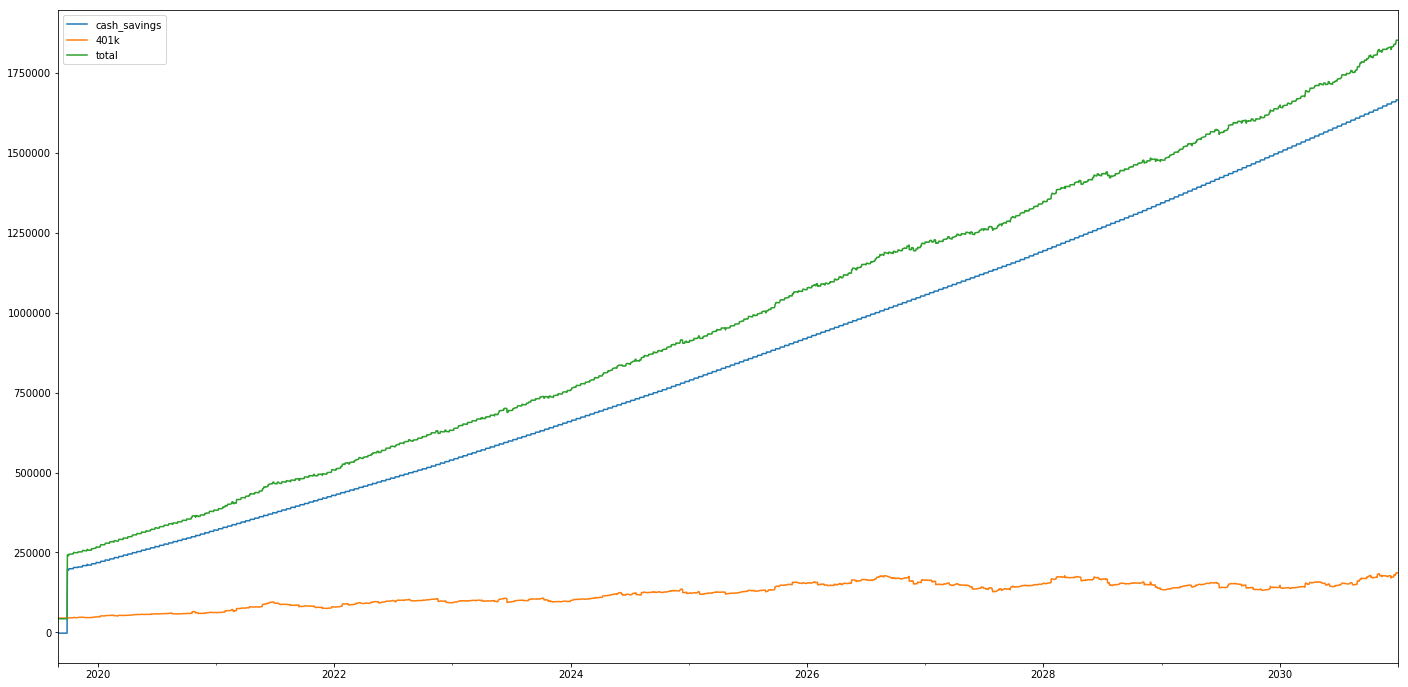

In [35]:
port.assets.generate_path_df()[:'2030'].plot(figsize=(24,12))

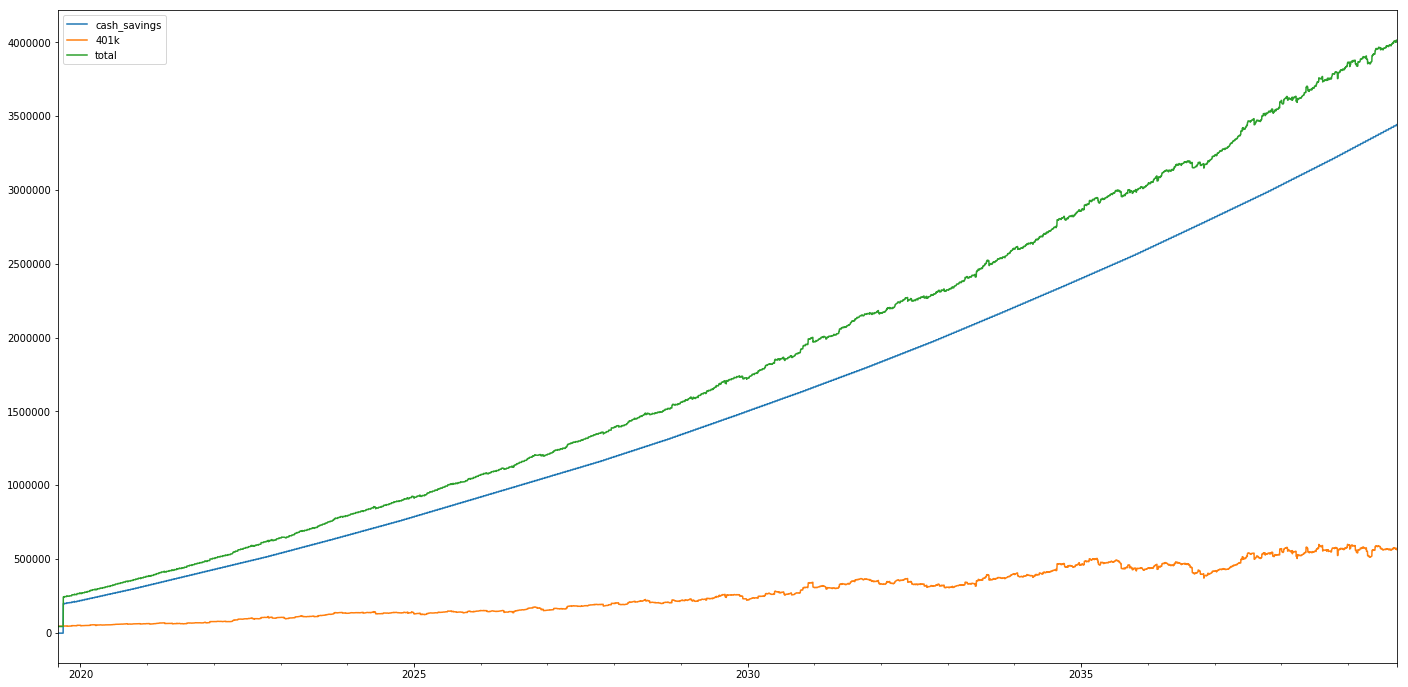

In [36]:
port.assets.generate_path_df().plot(figsize=(24,12))

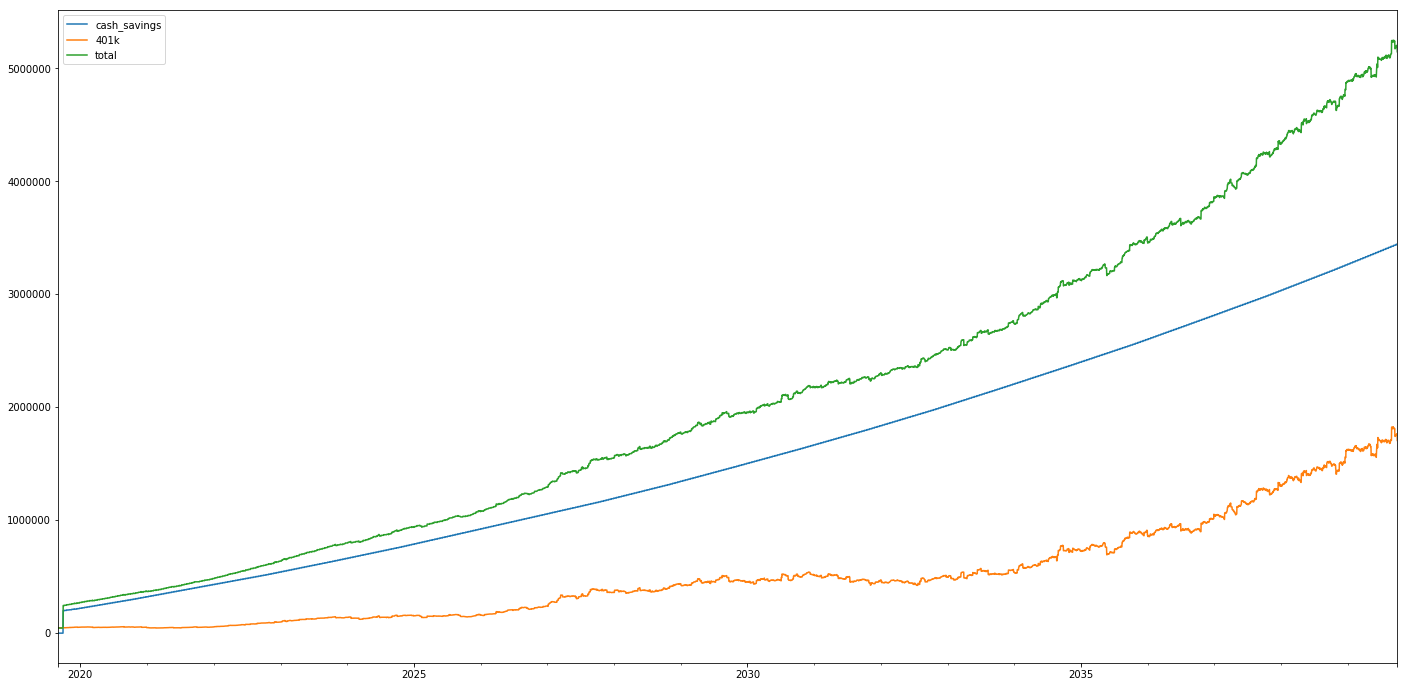

In [37]:
port.assets.generate_path_df().plot(figsize=(24,12))

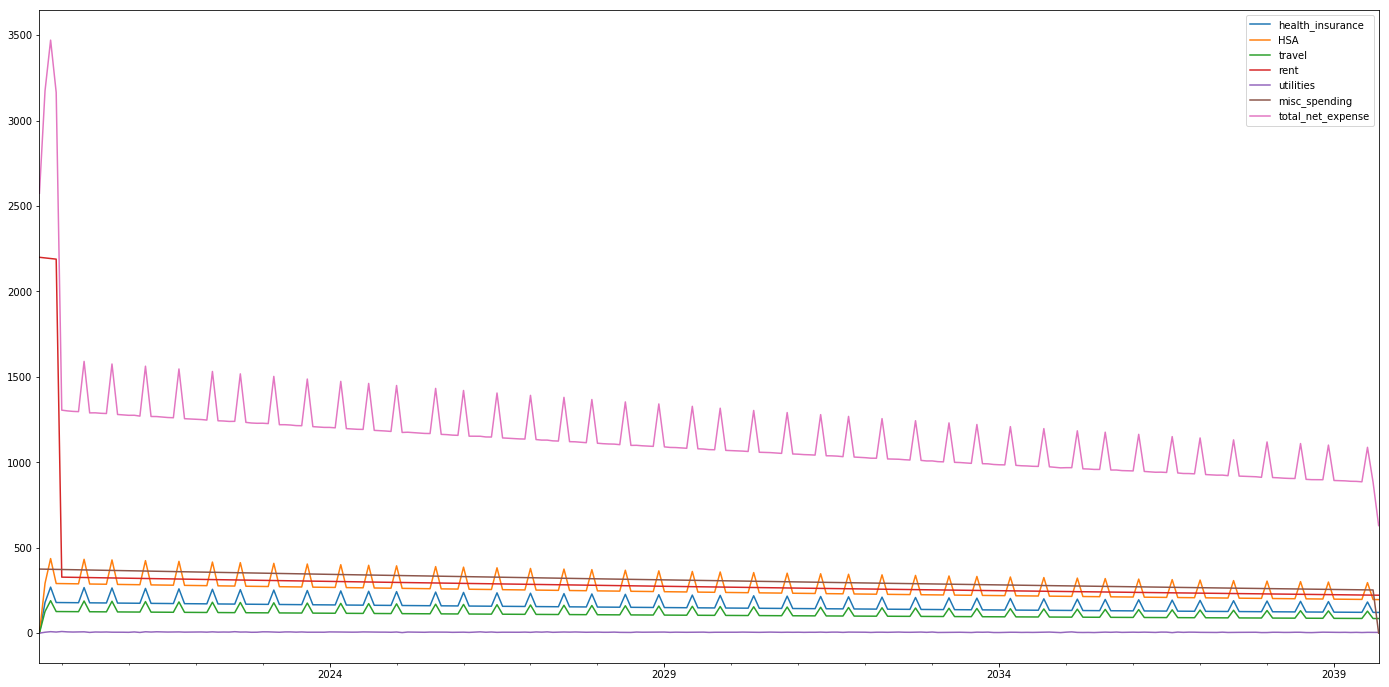

In [38]:
port.expenses.agg_cash_flows('M').multiply(-1).plot(figsize=(24,12))

In [39]:
port.all_cashflows

In [40]:
a = port.all_cashflows

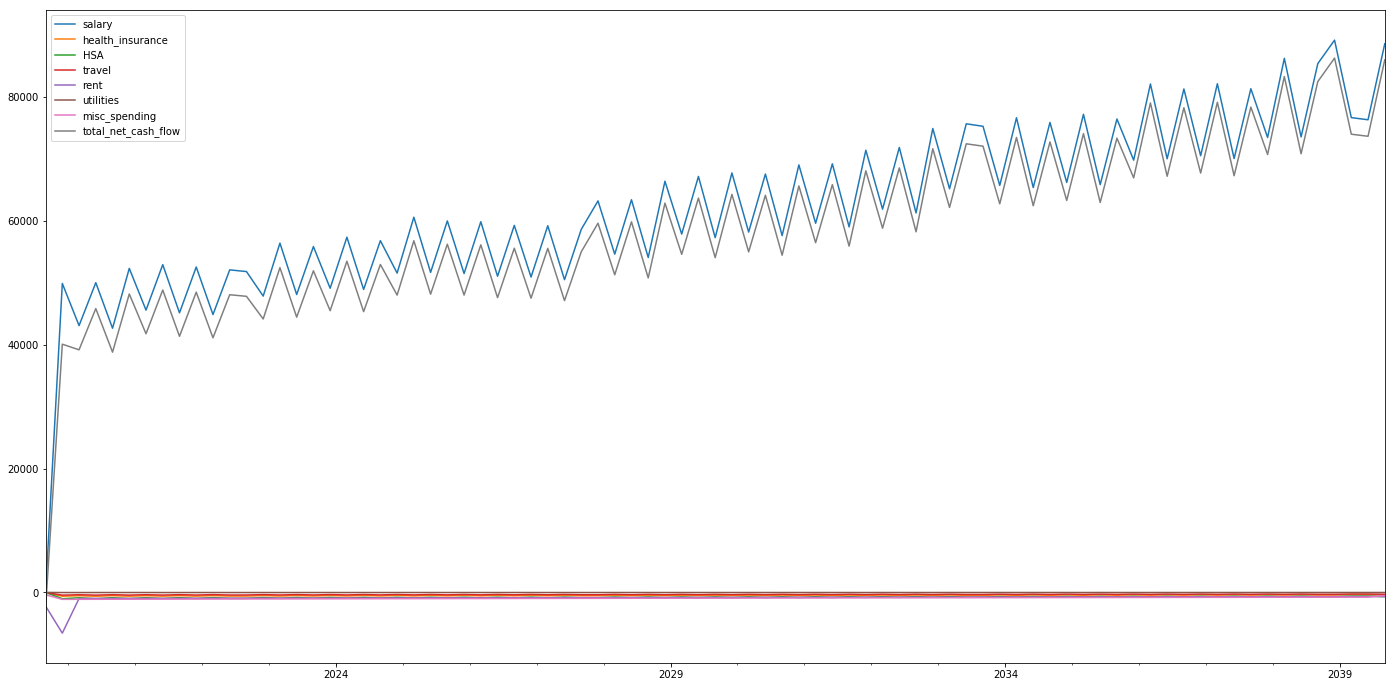

In [41]:
a.as_df.resample('3M').sum().plot(figsize=(24,12))

/Users/davidbrodsky/repos/gameplan/gameplan/collections.py:43: UserWarning: Label 'cash_inflows' already exists. Will overwrite.
  warnings.warn(warning_message)
/Users/davidbrodsky/repos/gameplan/gameplan/collections.py:43: UserWarning: Label 'cash_outflows' already exists. Will overwrite.
  warnings.warn(warning_message)


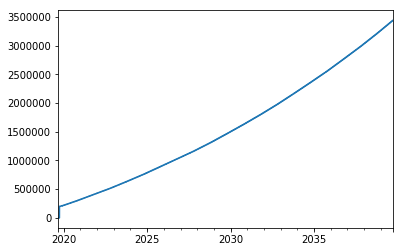

In [42]:
port.cash_savings.plot()

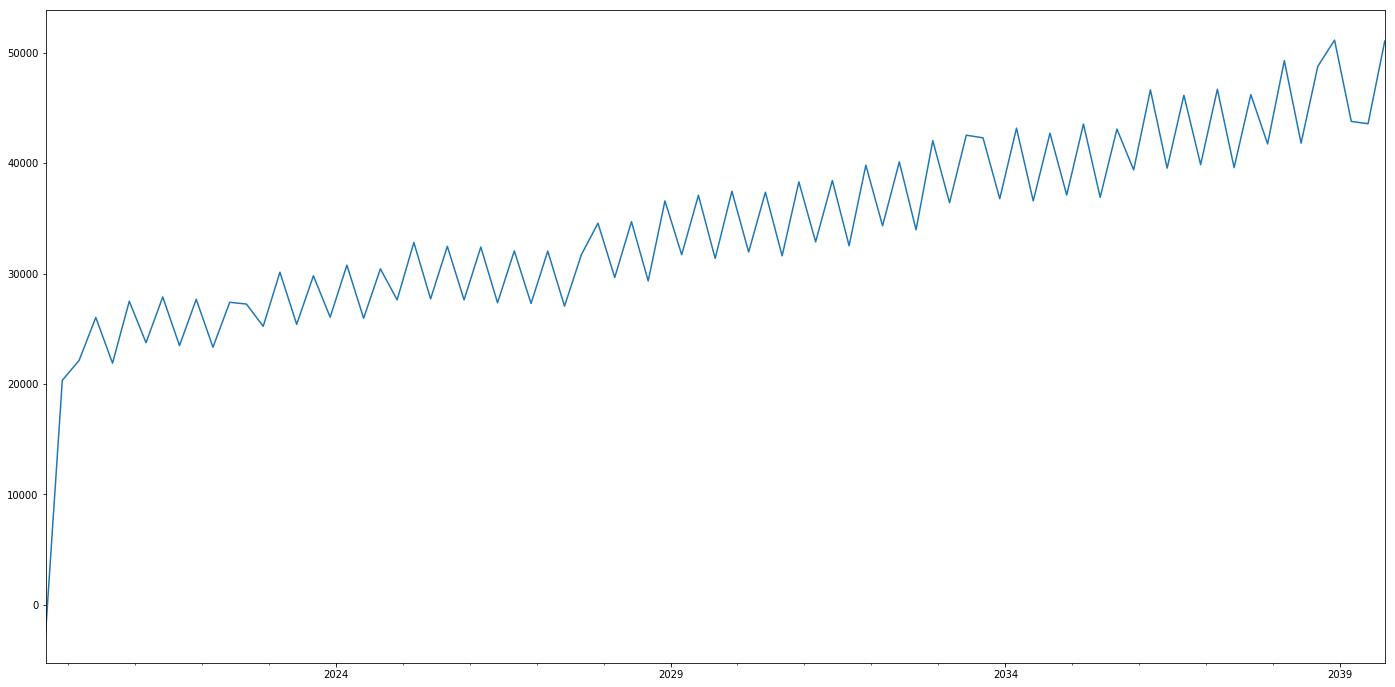

In [43]:
port.net_cashflows.resample('3M').sum().plot(figsize=(24,12))